In [ ]:
from pathlib import Path

# Get the path to the project directory
project_path = Path(__file__).resolve().parents[1] if '__file__' in globals() else Path().resolve().parent

# Now you can reference the data folder like this:
dataset_path = project_path / "data"

Mounted at /content/drive


In [5]:
import pandas as pd

data = pd.read_csv(dataset_path+"/weather.csv")
df = pd.DataFrame(data)
df.head(10)

,Unnamed: 0,name,id,address,date,GHI,latitude,longitude,time,surface_pressure,...,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,elevation,timezone,sunrise,sunset
0,0,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 10:45:00,0.970,51.10499,-114.250011,2017-11-21 10:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 11:45:00,23.927,51.10499,-114.250011,2017-11-21 11:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 12:45:00,69.659,51.10499,-114.250011,2017-11-21 12:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 13:45:00,59.172,51.10499,-114.250011,2017-11-21 13:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 14:45:00,18.061,51.10499,-114.250011,2017-11-21 14:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 08:45:00,12.285,51.10499,-114.250011,2017-11-22 08:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 09:00:00,20.961,51.10499,-114.250011,2017-11-22 09:00:00,884.2,...,274.0,71.0,19.9,6.5,0.0,0.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
7,7,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 09:45:00,42.792,51.10499,-114.250011,2017-11-22 09:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 10:00:00,50.230,51.10499,-114.250011,2017-11-22 10:00:00,883.8,...,201.0,89.0,11.9,3.1,0.0,0.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
9,9,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-22 10:45:00,166.551,51.10499,-114.250011,2017-11-22 10:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd
from datetime import datetime

def delete_missing_data(df):
    """Delete rows with missing data and print the percentage of data deleted."""
    rows_before = df.shape[0]
    df.dropna(inplace=True)
    rows_after = df.shape[0]
    rows_deleted = rows_before - rows_after
    percentage_deleted = (rows_deleted / rows_before) * 100
    print(f"Percentage of data deleted: {percentage_deleted:.2f}%")
    return df

def convert_to_datetime(df, columns):
    """Convert specified columns to datetime format, handling errors gracefully."""
    for column in columns:
        try:
            df[column] = pd.to_datetime(df[column])
        except ValueError:
            print(f"Error converting {column} to datetime. Skipping.")
    return df

def drop_columns(df, columns_to_drop):
    """Drop specified columns if they exist in the DataFrame."""
    df = df.drop(columns=columns_to_drop, errors='ignore')
    return df

def delete_duplicate_rows(df):
    """Check and delete duplicate rows, keeping the first occurrence."""
    duplicate_rows = df[df.duplicated()]
    if not duplicate_rows.empty:
        print("Duplicate rows found and removed.")
        df.drop_duplicates(inplace=True)
    else:
        print("No duplicate rows found.")
    return df

def delete_duplicate_columns(df):
    """Check for and delete duplicate columns, keeping the first occurrence."""
    duplicate_cols = df.columns[df.T.duplicated()]
    if not duplicate_cols.empty:
        print("Duplicate columns found and removed.")
        df_unique = df.T.drop_duplicates().T
        # Reconvert to original types (if needed)
        df_unique = df_unique.astype({col: df[col].dtype for col in df_unique.columns})
        df = df_unique
    else:
        print("No duplicate columns found.")
    return df

def split_time_series(df, date_column='date', train_ratio=0.8):
    """Split DataFrame into train and test sets for time series analysis."""
    df_sorted = df.sort_values(date_column)  # Ensure data is sorted by date
    train_size = int(len(df_sorted) * train_ratio)
    train_df = df_sorted[:train_size]
    test_df = df_sorted[train_size:]
    return train_df, test_df

def extract_date_features(df):
    """Extracts numerical features from the 'date' column."""
    datetime_columns = ['date', 'sunset', 'sunrise']
    # Ensure the column is in datetime format
    for datetime_column in datetime_columns:
      if datetime_column in df.columns:
        df[datetime_column] = pd.to_datetime(df[datetime_column])
        # Extract features
        df[f'{datetime_column}_year'] = df[datetime_column].dt.year
        df[f'{datetime_column}_month'] = df[datetime_column].dt.month
        df[f'{datetime_column}_day'] = df[datetime_column].dt.day
        df[f'{datetime_column}_hour'] = df[datetime_column].dt.hour
        df[f'{datetime_column}_minute'] = df[datetime_column].dt.minute

        df.drop(columns=[datetime_column], inplace=True)

    return df

# Main function to apply all steps
def preprocess_data(df):
    # Delete missing data
    df = delete_missing_data(df)

    # Convert columns to datetime
    datetime_columns = ['time', 'date', 'sunset', 'sunrise']
    df = convert_to_datetime(df, datetime_columns)

    # Drop unnecessary columns
    initial_columns_to_drop = ['Unnamed: 0', 'id', 'latitude', 'longitude', 'elevation', 'name', 'address', 'timezone']
    df = drop_columns(df, initial_columns_to_drop)

    # Delete duplicate rows and columns
    df = delete_duplicate_rows(df)
    df = delete_duplicate_columns(df)

    # Drop specific columns
    additional_columns_to_drop = ['sunrise', 'sunset', 'windspeed_10m', 'winddirection_10m']
    df = drop_columns(df, additional_columns_to_drop)

    df= extract_date_features(df)

    return df


new_df = preprocess_data(df)

new_df.head()

Percentage of data deleted: 1.35%
No duplicate rows found.
Duplicate columns found and removed.


,GHI,surface_pressure,snowfall,temperature_2m,relativehumidity_2m,windgusts_10m,precipitation,cloudcover,date_year,date_month,date_day,date_hour,date_minute
6,20.961,884.2,0.0,40.8,71.0,19.9,0.0,0.0,2017,11,22,9,0
8,50.230,883.8,0.0,31.9,89.0,11.9,0.0,0.0,2017,11,22,10,0
10,236.600,884.3,0.0,33.7,87.0,8.9,0.0,3.0,2017,11,22,11,0
12,399.535,884.3,0.0,36.5,84.0,8.3,0.0,2.0,2017,11,22,12,0
14,398.994,884.4,0.0,38.3,80.0,7.6,0.0,2.0,2017,11,22,13,0


In [7]:
new_df.shape

(24533, 13)

In [ ]:
# Split data for time series analysis
train_df, test_df = split_time_series(df, date_column='date', train_ratio=0.8)

### Auto Regressive Model

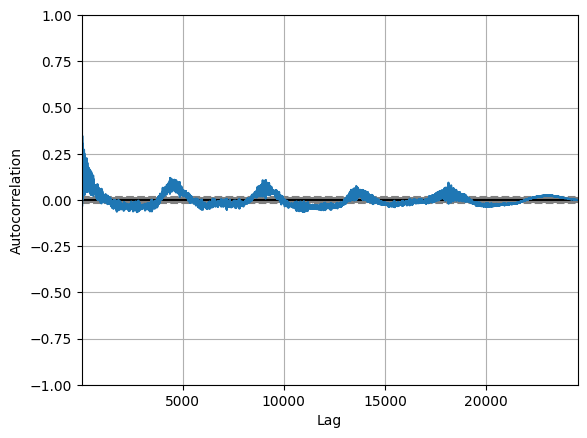

In [ ]:
### Auto Regressive Model
df_sarima = df.copy()
df_sarima = df_sarima.set_index('date')


from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['GHI'])
plt.show()


In [ ]:
df_sarima

,GHI,surface_pressure,snowfall,temperature_2m,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,sunrise,sunset,daylight_duration
date,,,,,,,,,,,,,
2017-11-22 09:00:00,20.961,884.2,0.0,40.8,274.0,71.0,19.9,6.5,0.0,0.0,2017-11-22 09:05:00,2017-11-22 17:40:00,8.583333
2017-11-22 10:00:00,50.230,883.8,0.0,31.9,201.0,89.0,11.9,3.1,0.0,0.0,2017-11-22 09:05:00,2017-11-22 17:40:00,8.583333
2017-11-22 11:00:00,236.600,884.3,0.0,33.7,173.0,87.0,8.9,3.6,0.0,3.0,2017-11-22 09:05:00,2017-11-22 17:40:00,8.583333
2017-11-22 12:00:00,399.535,884.3,0.0,36.5,124.0,84.0,8.3,4.0,0.0,2.0,2017-11-22 09:05:00,2017-11-22 17:40:00,8.583333
2017-11-22 13:00:00,398.994,884.4,0.0,38.3,118.0,80.0,7.6,4.3,0.0,2.0,2017-11-22 09:05:00,2017-11-22 17:40:00,8.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16 15:00:00,182.748,898.5,0.0,36.2,315.0,40.0,8.1,3.5,0.0,0.0,2023-03-16 07:47:00,2023-03-16 19:42:00,11.916667
2023-03-16 16:00:00,152.644,898.1,0.0,37.2,308.0,37.0,8.9,4.0,0.0,7.0,2023-03-16 07:47:00,2023-03-16 19:42:00,11.916667
2023-03-16 17:00:00,100.145,897.8,0.0,36.7,297.0,41.0,8.9,3.5,0.0,0.0,2023-03-16 07:47:00,2023-03-16 19:42:00,11.916667


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

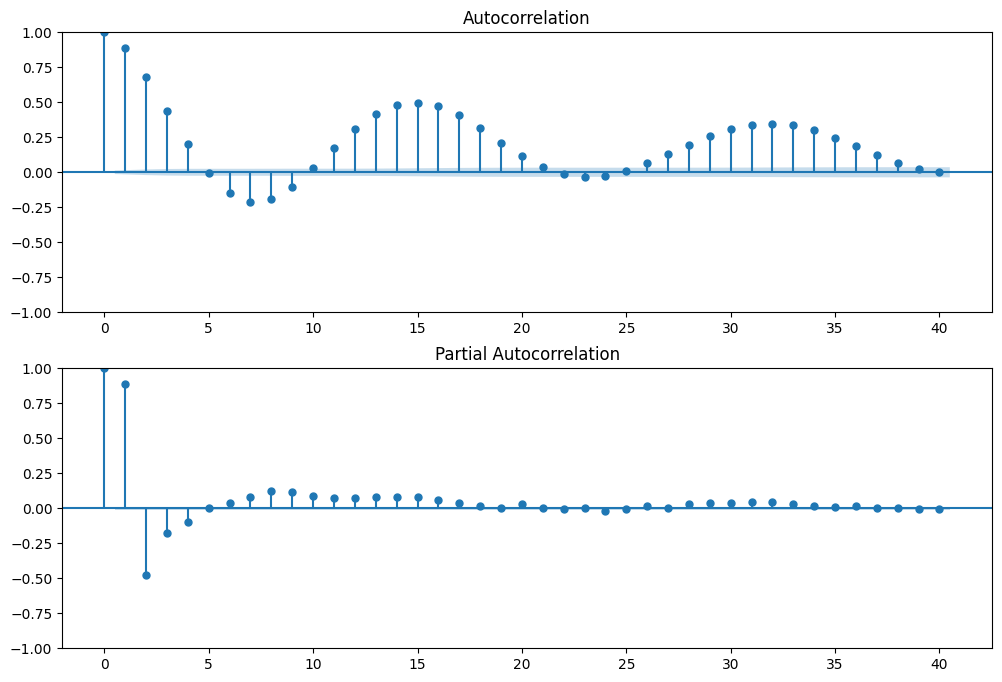

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['GHI'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
# Corrected the column name to 'GHI' and added a comment explaining the change
fig = sm.graphics.tsa.plot_pacf(df['GHI'],lags=40,ax=ax2) # Use 'GHI' column for PACF plot as well

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['GHI'],order=(2,0,2)) # For seasonal data p=3, d=0, q=1 or 2
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GHI   No. Observations:                24533
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -133362.260
Date:                Wed, 06 Nov 2024   AIC                         266736.521
Time:                        11:47:02   BIC                         266785.167
Sample:                             0   HQIC                        266752.280
                              - 24533                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.2594      2.128     58.855      0.000     121.088     129.431
ar.L1          1.5751      0.010    164.272      0.000       1.556       1.594
ar.L2         -0.7180      0.008    -89.445      0.000      -0.734      -0.702
ma.L1         -0.3673      0.010    -37.183      0.000      -0.387      -0.348
ma.L2          0.0300      0.006      4.650      0.000       0.017       0.043
sigma2      3080.8837     18.790    163.966      0.000    3044.056    3117.711
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             28799.35
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

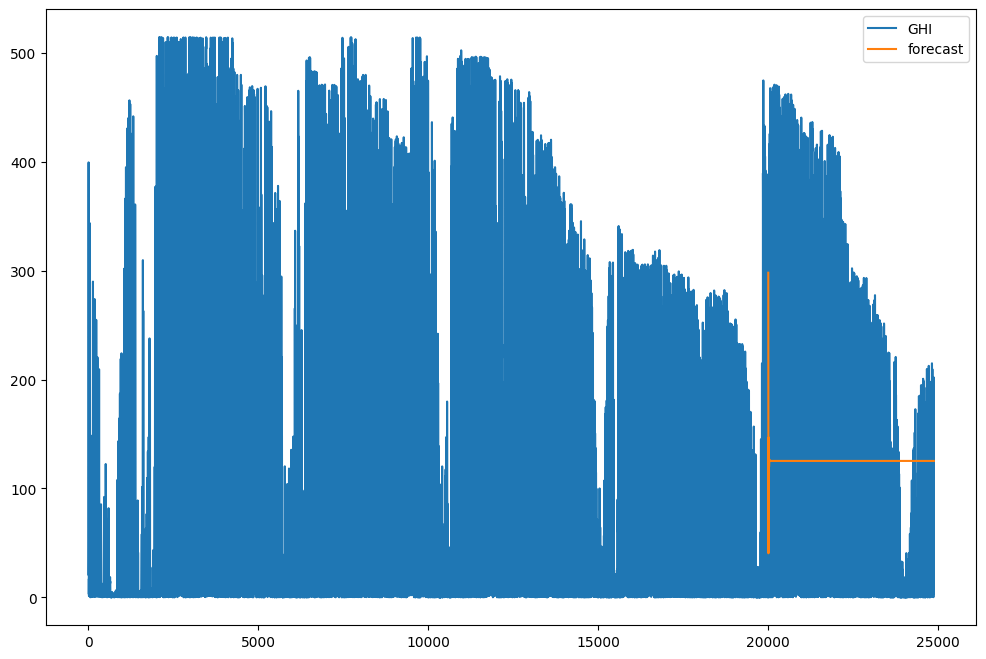

In [ ]:
df['forecast']=model_fit.predict(start=20000,end=25000,dynamic=True)
df[['GHI','forecast']].plot(figsize=(12,8))


In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['GHI'],order=(3, 0, 1),seasonal_order=(3, 0, 1,11))
results=model.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

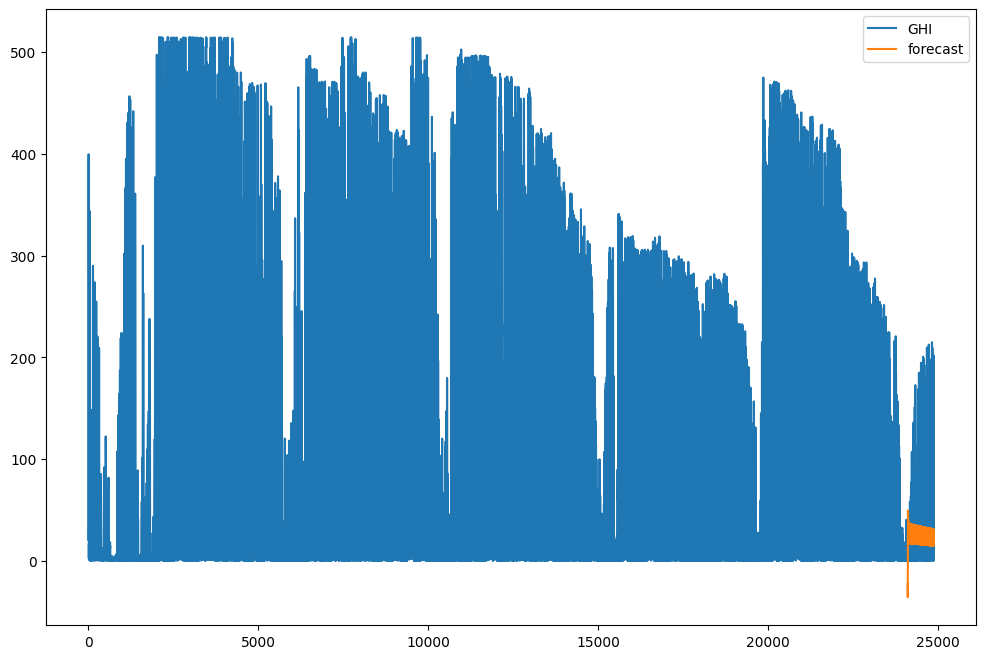

In [ ]:
df['forecast']=results.predict(start=24100,end=25000,dynamic=True)
df[['GHI','forecast']].plot(figsize=(12,8))
